# Capstone Webscrapping using BeautifulSoup

This notebook contains guidances & tasks on the data processing for the application

## background

Projek ini melakukan scrapping dengan sumber pada halaman website https://www.exchange-rates.org/history/IDR/USD/T kemudian mengambil informasi yang dibutuhkan yaitu Tanggal, Harga Saham, dan Hari.

## Requesting the Data and Creating a BeautifulSoup

Let's begin with requesting the web from the site with `get` method.

In [33]:
import requests

url_get = requests.get('https://www.exchange-rates.org/history/IDR/USD/T')

To visualize what exactly you get from the `request.get`, we can use .content so ee what we exactly get, in here i slice it so it won't make our screen full of the html we get from the page. You can delete the slicing if you want to see what we fully get.

In [34]:
url_get.content[1:500]

b'!DOCTYPE html>\r\n<!--[if lt IE 9]>\r\n<html class="no-js ie8 oldie" lang="en" xml:lang=\'en\'>\r\n<![endif]-->\r\n<!--[if gt IE 8]><!--><html class="no-js" lang="en" xml:lang=\'en\'><!--<![endif]-->\r\n<head>\r\n<title>Indonesian Rupiah Exchange Rate - US Dollar - Historical Exchange Rates</title>\r\n<meta http-equiv="X-UA-Compatible" content="IE=edge">\r\n<meta name="viewport" content="width=device-width, initial-scale=1, maximum-scale=5">\r\n<meta charset="utf-8" /><meta http-equiv="Content-Type" content="text/ht'

As we can see we get a very unstructured and complex html, which actually contains the codes needed to show the webpages on your web browser. But we as human still confused what and where we can use that piece of code, so here where we use the beautifulsoup. Beautiful soup class will result a beautifulsoup object. Beautiful Soup transforms a complex HTML document into a complex tree of Python objects. 

Let's make Beautiful soup object and feel free to explore the object here.

In [35]:
from bs4 import BeautifulSoup 

soup = BeautifulSoup(url_get.content,"html.parser")
print (type(soup))

<class 'bs4.BeautifulSoup'>


In [36]:
print(soup.prettify()[:500])

<!DOCTYPE html>
<!--[if lt IE 9]>
<html class="no-js ie8 oldie" lang="en" xml:lang='en'>
<![endif]-->
<!--[if gt IE 8]><!-->
<html class="no-js" lang="en" xml:lang="en">
 <!--<![endif]-->
 <head>
  <title>
   Indonesian Rupiah Exchange Rate - US Dollar - Historical Exchange Rates
  </title>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta content="width=device-width, initial-scale=1, maximum-scale=5" name="viewport"/>
  <meta charset="utf-8">
   <meta content="text/html; charse


## Finding the right key to scrap the data & Extracting the right information

Find the key and put the key into the `.find()` Put all the exploring the right key at this cell. Menemukan key pada halaman website dengan menggunakan inspect pada browser sehingga ditampikan struktur html yang dapat dimodifikasi. 

In [37]:
table1 = soup.find('table', attrs={'class':'table table-striped table-hover table-hover-solid-row table-simple history-data'})
print(table1.prettify()[1:])

table class="table table-striped table-hover table-hover-solid-row table-simple history-data">
 <tbody>
  <tr>
   <td>
    1/7/2022
   </td>
   <td>
    Friday
   </td>
   <td>
    <a href="/Rate/USD/IDR/1-7-2022">
     14,303.69386
    </a>
    IDR
   </td>
   <td class="text-narrow-screen-hidden">
    <a href="/Rate/USD/IDR/1-7-2022">
     USD IDR rate for 1/7/2022
    </a>
   </td>
  </tr>
  <tr>
   <td>
    1/6/2022
   </td>
   <td>
    Thursday
   </td>
   <td>
    <a href="/Rate/USD/IDR/1-6-2022">
     14,387.13904
    </a>
    IDR
   </td>
   <td class="text-narrow-screen-hidden">
    <a href="/Rate/USD/IDR/1-6-2022">
     USD IDR rate for 1/6/2022
    </a>
   </td>
  </tr>
  <tr>
   <td>
    1/5/2022
   </td>
   <td>
    Wednesday
   </td>
   <td>
    <a href="/Rate/USD/IDR/1-5-2022">
     14,376.59427
    </a>
    IDR
   </td>
   <td class="text-narrow-screen-hidden">
    <a href="/Rate/USD/IDR/1-5-2022">
     USD IDR rate for 1/5/2022
    </a>
   </td>
  </tr>
  <tr>
   <td>


Finding row length.

Do the scrapping process here.
Menemukan semua table yang mengandung 'td'

In [38]:
row = table1.find_all('td')
row_length = len(row)
row_length

520

In [39]:
row

[<td>1/7/2022</td>,
 <td>Friday</td>,
 <td><a href="/Rate/USD/IDR/1-7-2022">14,303.69386</a> IDR</td>,
 <td class="text-narrow-screen-hidden"><a href="/Rate/USD/IDR/1-7-2022">USD IDR rate for 1/7/2022</a></td>,
 <td>1/6/2022</td>,
 <td>Thursday</td>,
 <td><a href="/Rate/USD/IDR/1-6-2022">14,387.13904</a> IDR</td>,
 <td class="text-narrow-screen-hidden"><a href="/Rate/USD/IDR/1-6-2022">USD IDR rate for 1/6/2022</a></td>,
 <td>1/5/2022</td>,
 <td>Wednesday</td>,
 <td><a href="/Rate/USD/IDR/1-5-2022">14,376.59427</a> IDR</td>,
 <td class="text-narrow-screen-hidden"><a href="/Rate/USD/IDR/1-5-2022">USD IDR rate for 1/5/2022</a></td>,
 <td>1/4/2022</td>,
 <td>Tuesday</td>,
 <td><a href="/Rate/USD/IDR/1-4-2022">14,306.22137</a> IDR</td>,
 <td class="text-narrow-screen-hidden"><a href="/Rate/USD/IDR/1-4-2022">USD IDR rate for 1/4/2022</a></td>,
 <td>1/3/2022</td>,
 <td>Monday</td>,
 <td><a href="/Rate/USD/IDR/1-3-2022">14,271.10676</a> IDR</td>,
 <td class="text-narrow-screen-hidden"><a href=


Dilakukan proses looping menggunakan kode di bawah,yang akan mengembalikan nilai tanggal, hari dan harga

In [40]:
tanggal_temp = []
hari_temp = []
harga_temp = []

for i in range(0, row_length):
    
    #get tanggal
    for i in range(0, row_length, 4):
        tanggal = tanggal_temp.append(row[i].get_text())
    
    #get hari
    for i in range(1, row_length, 4):
        hari = hari_temp.append(row[i].get_text())
    
    #get harga
    for i in range(2, row_length, 4):
        harga = harga_temp.append(row[i].get_text())
        

## Creating data frame & Data wrangling

Put the array into dataframe

In [41]:
import pandas as pd
df = pd.DataFrame()
df['Tanggal'] = tanggal_temp
df['Hari'] = hari_temp
df['Harga'] = harga_temp
df.head()

,Tanggal,Hari,Harga
0,1/7/2022,Friday,"14,303.69386 IDR"
1,1/6/2022,Thursday,"14,387.13904 IDR"
2,1/5/2022,Wednesday,"14,376.59427 IDR"
3,1/4/2022,Tuesday,"14,306.22137 IDR"
4,1/3/2022,Monday,"14,271.10676 IDR"


Do the data cleaning here (please change this markdown with your explanation of what you do for data wrangling)

In [42]:
df.dtypes


Tanggal    object
Hari       object
Harga      object
dtype: object

In [43]:
df['Tanggal'] = df['Tanggal'].astype('datetime64')

In [44]:
df['Tanggal']

0       2022-01-07
1       2022-01-06
2       2022-01-05
3       2022-01-04
4       2022-01-03
           ...    
67595   2021-07-16
67596   2021-07-15
67597   2021-07-14
67598   2021-07-13
67599   2021-07-12
Name: Tanggal, Length: 67600, dtype: datetime64[ns]

In [45]:
df.dtypes


Tanggal    datetime64[ns]
Hari               object
Harga              object
dtype: object

In [46]:
df.head()

,Tanggal,Hari,Harga
0,2022-01-07,Friday,"14,303.69386 IDR"
1,2022-01-06,Thursday,"14,387.13904 IDR"
2,2022-01-05,Wednesday,"14,376.59427 IDR"
3,2022-01-04,Tuesday,"14,306.22137 IDR"
4,2022-01-03,Monday,"14,271.10676 IDR"


Data visualisation (please change this markdown with your explanation of what you do for data wrangling)

In [47]:
df['Harga'] = df['Harga'].apply(lambda x: x.replace('IDR', ''))
df['Harga'] = df['Harga'].apply(lambda x: x.replace(',', ''))


In [48]:
df.head()

,Tanggal,Hari,Harga
0,2022-01-07,Friday,14303.69386
1,2022-01-06,Thursday,14387.13904
2,2022-01-05,Wednesday,14376.59427
3,2022-01-04,Tuesday,14306.22137
4,2022-01-03,Monday,14271.10676


In [49]:
df['Harga'] = df['Harga'].astype('float')

In [17]:
df.dtypes

Tanggal    datetime64[ns]
Hari               object
Harga             float64
dtype: object

### Implementing your webscrapping to the flask dashboard

- Copy paste all of your web scrapping process to the desired position on the `app.py`
- Changing the title of the dasboard at `index.html`

## Finishing This Notebook with Your Analysis and Conclusion

First you can do start with making the data visualisation. 

In [53]:
df =df.set_index('Tanggal')

<AxesSubplot:xlabel='Tanggal'>

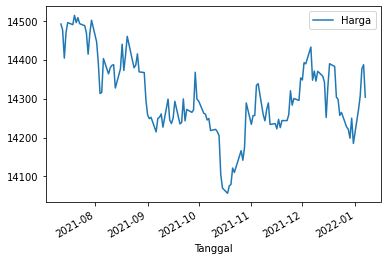

In [54]:
df.plot()

Dapat dilihat pergerakan kurs Indonesia terhadap USD sangat fluktuatif mulai dari periode Agustus 2021 hingga Januari 2022


### Extra Challange

This will be not included to the scoring. 

- You can create additional analysis from the data.
- Implement it to the dashboard with at `app.py` dan `index.html`.